<a href="https://colab.research.google.com/github/ismael094/WeatherCNN/blob/master/WeatherCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Convolutiva sobre el tiempo

Esta red clasifica cuatro estados diferentes sobre el estado del tiempo: Muy nublado, nublado, poco nublado y despejado.
Como dataset he utilizado diferentes webcams repartidas tanto por Canarias como por España, utilizadas para conseguir las imágenes.


In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
from PIL import ImageFile
from keras.utils import plot_model
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


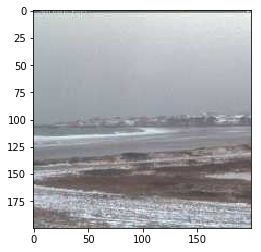

In [0]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Tiempo/train/0/20130102_114014.jpg', 'r')
imshow(np.asarray(pil_im))

Utilizamos dos conjuntos de imágenes: uno para el entrenamiento y otro para la validación.

In [0]:
batch_size = 32

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Tiempo/train/'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Tiempo/validation/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        shuffle=True,
        class_mode='categorical')

Found 2160 images belonging to 4 classes.
Found 1097 images belonging to 4 classes.


# Modelo 1
## CNN_64, Pool, CNN_128, Pool, CNN_256, Pool, CNN_128, Pool, FC_128,FC_128

In [0]:
# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1,
      shuffle=True
)

Epoch 1/10
100/100 [==============================] - 37s 371ms/step - loss: 0.9036 - acc: 0.6081 - val_loss: 0.9233 - val_acc: 0.4513
Epoch 2/10
100/100 [==============================] - 33s 329ms/step - loss: 0.7204 - acc: 0.7084 - val_loss: 0.7560 - val_acc: 0.6598
Epoch 3/10
100/100 [==============================] - 33s 333ms/step - loss: 0.7042 - acc: 0.7119 - val_loss: 0.7834 - val_acc: 0.6765
Epoch 4/10
100/100 [==============================] - 33s 334ms/step - loss: 0.6241 - acc: 0.7506 - val_loss: 0.7084 - val_acc: 0.6959
Epoch 5/10
100/100 [==============================] - 33s 326ms/step - loss: 0.6071 - acc: 0.7572 - val_loss: 0.6840 - val_acc: 0.7152
Epoch 6/10
100/100 [==============================] - 34s 339ms/step - loss: 0.5734 - acc: 0.7719 - val_loss: 0.6246 - val_acc: 0.7493
Epoch 7/10
100/100 [==============================] - 32s 324ms/step - loss: 0.5371 - acc: 0.7863 - val_loss: 0.6631 - val_acc: 0.7228
Epoch 8/10
100/100 [==============================] - 3

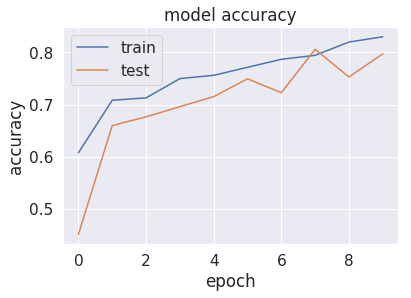

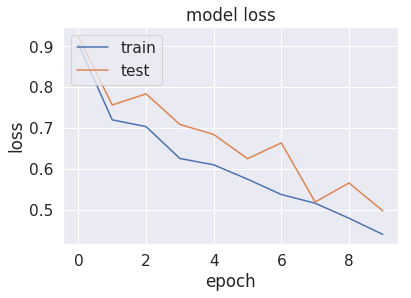

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Modelo 2
## CNN_64, Pool, CNN_128, Pool, CNN_256, Pool, CNN_128, Pool, FC_128,FC_128

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1,
      shuffle=True
)

Epoch 1/15
100/100 [==============================] - 39s 392ms/step - loss: 1.0332 - acc: 0.5647 - val_loss: 1.0646 - val_acc: 0.4170
Epoch 2/15
100/100 [==============================] - 35s 351ms/step - loss: 0.7904 - acc: 0.6688 - val_loss: 0.7636 - val_acc: 0.7095
Epoch 3/15
100/100 [==============================] - 36s 356ms/step - loss: 0.6935 - acc: 0.7381 - val_loss: 0.6814 - val_acc: 0.7333
Epoch 4/15
100/100 [==============================] - 33s 334ms/step - loss: 0.6225 - acc: 0.7566 - val_loss: 0.6322 - val_acc: 0.7852
Epoch 5/15
100/100 [==============================] - 34s 342ms/step - loss: 0.5921 - acc: 0.7781 - val_loss: 0.7532 - val_acc: 0.7162
Epoch 6/15
100/100 [==============================] - 34s 339ms/step - loss: 0.5365 - acc: 0.8100 - val_loss: 0.6940 - val_acc: 0.7432
Epoch 7/15
100/100 [==============================] - 34s 343ms/step - loss: 0.5313 - acc: 0.8053 - val_loss: 0.6375 - val_acc: 0.7357
Epoch 8/15
100/100 [==============================] - 3

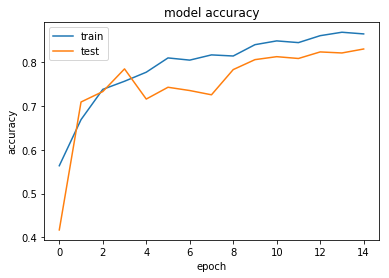

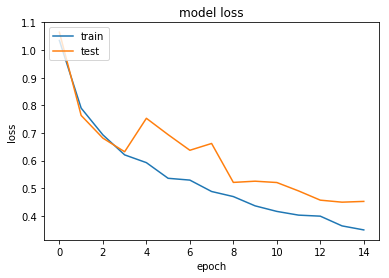

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Modelo 3
## CNN_256, Pool, CNN_512, Pool, CNN_512, Pool, CNN_256, Pool, CNN_128 Pool, FC_128,FC_256

In [0]:
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1,
      shuffle=True
)

Epoch 1/10
100/100 [==============================] - 44s 442ms/step - loss: 0.9329 - acc: 0.6031 - val_loss: 0.9990 - val_acc: 0.4610
Epoch 2/10
100/100 [==============================] - 42s 419ms/step - loss: 0.7905 - acc: 0.6747 - val_loss: 0.7155 - val_acc: 0.7258
Epoch 3/10
100/100 [==============================] - 42s 418ms/step - loss: 0.6792 - acc: 0.7366 - val_loss: 0.7728 - val_acc: 0.6711
Epoch 4/10
100/100 [==============================] - 42s 421ms/step - loss: 0.6048 - acc: 0.7647 - val_loss: 0.7329 - val_acc: 0.7622
Epoch 5/10
100/100 [==============================] - 42s 421ms/step - loss: 0.5766 - acc: 0.7803 - val_loss: 0.7312 - val_acc: 0.6836
Epoch 6/10
100/100 [==============================] - 42s 421ms/step - loss: 0.5518 - acc: 0.7900 - val_loss: 0.6708 - val_acc: 0.7263
Epoch 7/10
100/100 [==============================] - 41s 412ms/step - loss: 0.5190 - acc: 0.8075 - val_loss: 0.6283 - val_acc: 0.7499
Epoch 8/10
100/100 [==============================] - 4

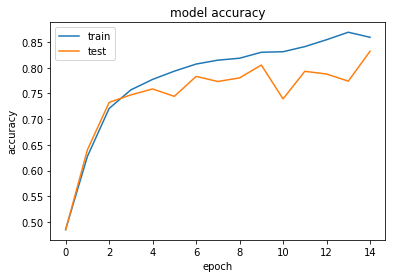

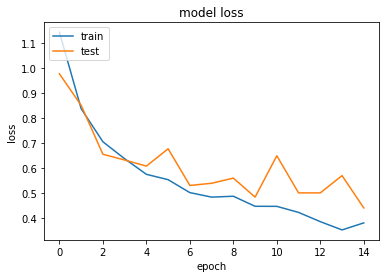

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Guardar pesos

In [0]:
model.save_weights('/content/drive/My Drive/Colab Notebooks/datasets/Tiempo/WeatherCNN_retrain.h5')

### Cargar pesos

In [0]:
model.load_weights('/content/drive/My Drive/Colab Notebooks/datasets/Tiempo/WeatherCNN.h5')

# Resultados

Los mejores resultados han sido los del modelo 2, con un 83% de accuracy.

## Probar red con imagen URL

Utilizamos un par de fotos nuevas para realizar pruebas de predicción

['Muy nublado', 'Nublado', 'Poco nublado', 'Despejado']
[[0. 1. 0. 0.]]


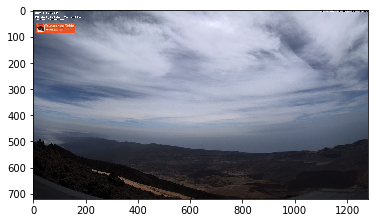

In [0]:
from keras.preprocessing import image
import numpy as np
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import requests
from io import BytesIO

%matplotlib inline
response = requests.get('https://apalmet.es/external-content.php?url=http://www.sky-live.tv/liveimages/webcam/opensky/cam3-teleferico-PNteide-CAN.jpg')
pil_im = Image.open(BytesIO(response.content))
pil_im.save('/content/drive/My Drive/Colab Notebooks/images/12345.jpg') 
imshow(np.asarray(pil_im))

test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/images/12345.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(['Muy nublado','Nublado','Poco nublado','Despejado'])
print(result)

['Muy nublado', 'Nublado', 'Poco nublado', 'Despejado']
[[0. 0. 1. 0.]]


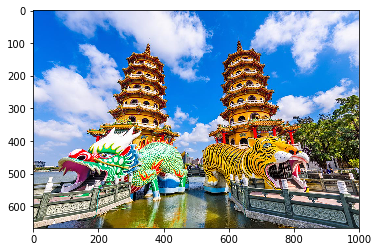

In [0]:
from PIL import ImageEnhance
%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/images/TaiwanCities2.jpg')
imshow(np.asarray(pil_im))

test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/images/TaiwanCities2.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(['Muy nublado','Nublado','Poco nublado','Despejado'])
print(result)